# Multidimensional scaling

This notebook shows the multidimensional scaling of the RBD variants space.

## Set up the analysis

### Import the python modules

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import utils.mds_utils as utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

### Data preparing

#### DMS data

In [2]:
dms=pd.read_csv('../data/GMM_covid_info_seq.csv',index_col=0)
dms["annotation"]="dms"

In [3]:
dms.head()

,aa_substitutions,avg_bind,ace2_bind,COV2-2096_400,COV2-2832_400,COV2-2094_400,COV2-2050_400,COV2-2677_400,COV2-2479_400,COV2-2165_400,COV2-2499_400,seq,annotation
1,A105S,-0.072727,0,0,0,0,0,0,0,0,0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,dms
2,A105S A145I,-0.680000,0,0,0,0,0,0,0,0,0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,dms
3,A105S E141L,-0.495000,0,0,0,0,0,0,0,0,0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,dms
4,A105S E141S,-0.180000,0,0,0,0,0,0,0,0,0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,dms
5,A105S E154G,-0.210000,0,0,0,0,1,0,0,0,0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,dms


In [4]:
with open('../data/Covid19_RBD_seq.txt','r') as f:
    wt_seq=f.read()

In [5]:
def count_mt(mt,wt):
    if len(mt)!= len(wt):
        raise Exception("The length of mt and wt are not equal")
    return len([i for i in range(len(wt)) if mt[i] != wt[i]])

In [6]:
dms["num_mt"]=dms["seq"].apply(count_mt,args=(wt_seq,))

In [7]:
df1=dms.sample(n=120,random_state=3).loc[:,["seq","annotation","num_mt"]]

#### Exiting sequences

In [8]:
gisaid=pd.read_csv('../data/unique_GISAID.csv',index_col=0)
gisaid["annotation"]="gisaid"

In [9]:
gisaid=gisaid.rename(columns={"RBD_seq":"seq"})
gisaid.head()

,n_seq,seq,seqlen,gene_id,date,timestamp,host,group,country,continent,dataset,accession,annotation
0,602966,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/Wuhan/IPBCAMS-WH-01/2019,2019-12-24,1.577135e+09,human,human,Wuhan,Asia (Eastern),gisaid,Spike|hCoV-19/Wuhan/IPBCAMS-WH-01/2019|2019-12...,gisaid
1,45917,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/Nigeria/CV714/2020,2020-01-01,1.577826e+09,human,human,Nigeria,Africa (Western),gisaid,Spike|hCoV-19/Nigeria/CV714/2020|2020-00-00|EP...,gisaid
2,55547,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/France/PAC-IHU-37302-Nova1M/2020,2020-01-01,1.577826e+09,human,human,France,Europe,gisaid,Spike|hCoV-19/France/PAC-IHU-37302-Nova1M/2020...,gisaid
3,26230,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/England/NORT-1B7E6B2/2020,2020-01-01,1.577826e+09,human,human,England,Europe,gisaid,Spike|hCoV-19/England/NORT-1B7E6B2/2020|2020-0...,gisaid
4,895810,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/England/PORT-2E44AA/2020,2020-01-01,1.577826e+09,human,human,England,Europe,gisaid,Spike|hCoV-19/England/PORT-2E44AA/2020|2020-00...,gisaid


In [10]:
gisaid["num_mt"]=gisaid["seq"].apply(count_mt,args=(wt_seq,))

In [11]:
df2=gisaid.sort_values(by="n_seq",ascending=False).loc[:,["seq","annotation","num_mt"]][0:100].reset_index(drop=True)
df2["annotation"]="top_pop"

In [12]:
VOC=pd.read_csv('../data/sars-cov-2_variants_update.csv',index_col=0)

In [13]:
df2[df2["seq"]==VOC["seq"][4]]

,seq,annotation,num_mt
4,NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNLAPFFT...,top_pop,15


In [14]:
df2.iloc[4,1]="Omicron"

#### Synthetic data

In [15]:
synthetic=pd.read_csv('../result/gisaid_synthetic_seq.csv',index_col=0)
synthetic["annotation"]="synthetic"
synthetic=synthetic.rename(columns={"3":"seq"})

In [16]:
synthetic.head()

,seq,annotation
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVSDYSVLYNSASFST...,synthetic
1,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,synthetic
2,NITNLCPFGEVFNATRFASVYAGNRKRISNCVADYSVLYNSASFST...,synthetic
3,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASCST...,synthetic
4,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,synthetic


In [17]:
synthetic["num_mt"]=synthetic["seq"].apply(count_mt,args=(wt_seq,))

In [18]:
df3=synthetic.sample(n=240,random_state=3).loc[:,["seq","annotation","num_mt"]]

## MDS plot

In [19]:
df=pd.concat([df1,df2,df3]).reset_index(drop=True)

In [20]:
df.shape

(460, 3)

In [21]:
df.loc[df.shape[0]]=[wt_seq,"wt",0]

In [22]:
enc_seqs = utils.encode_aa_seq_list_as_matrix_of_flattened_one_hots(list(df['seq']))
print(enc_seqs.shape)

(461, 4221)


In [23]:
DIMRED = MDS
s = DIMRED(n_components=2, random_state=42).fit_transform(enc_seqs)

In [26]:
color_palette=["#be88a2","#6199be","#c25c26","#d69f21","#1c4d6a",]

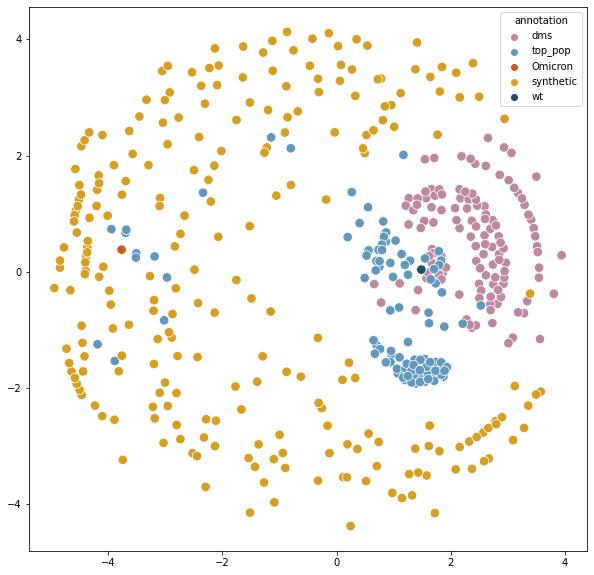

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=s[:,0], y=s[:,1], hue=df['annotation'], palette=color_palette, s=90)
plt.show()

In [28]:
mds_dist = sklearn.metrics.pairwise_distances(s)
ld_dist = utils.levenshtein_distance_matrix(list(df['seq']))

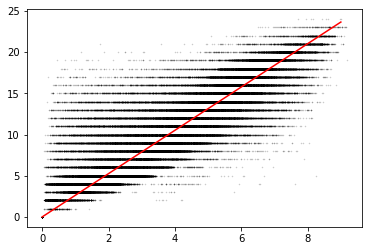

[[1.         0.84909548]
 [0.84909548 1.        ]]
1 MDS unit is 2.63 mutations
1 mutation is 0.38 MDS units


In [29]:
lm = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(mds_dist.reshape((-1,1)), ld_dist.reshape(-1))
xx = np.array([0, 9])

plt.plot(mds_dist.reshape(-1), ld_dist.reshape(-1), '.k', markersize=1, alpha=0.1)
plt.plot(xx, xx*lm.coef_, '-r')
plt.show()


print(np.corrcoef(mds_dist.reshape(-1), ld_dist.reshape(-1)))

print('1 MDS unit is %0.2f mutations' % lm.coef_)
print('1 mutation is %0.2f MDS units' % (1/lm.coef_[0]))

MDS_UNITS_PER_MUTATION = (1/lm.coef_[0])

In [31]:
uannots = ['dms', 'top_pop', 'synthetic']
bandwidths = [0.3, 0.3, 0.4,0.3]
alphas = [0.3, 0.3, 0.4,0.3]

In [32]:
color_palette=["#be88a2","#6199be","#d69f21","#1c4d6a","#c25c26"]

/home/chenn0a/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chenn0a/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/chenn0a/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/chenn0a/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable a

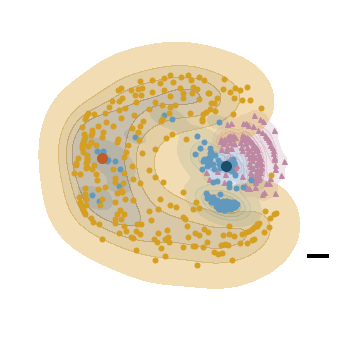

In [33]:
SCALE_BAR_NMUT = 2

fig = plt.figure(figsize=(6,6))
for i,annot in enumerate(uannots):

    mask = df['annotation'] == annot
    if annot in ["dms"]:
        sns.kdeplot(s[mask,0], s[mask,1], shade=True, shade_lowest=False, alpha=alphas[i], levels=5, bw=bandwidths[i],
               color=color_palette[i])
        plt.plot(s[mask,0], s[mask,1], '^', color=color_palette[i], markersize=5)
    else:
        sns.kdeplot(s[mask,0], s[mask,1], shade=True, shade_lowest=False, alpha=alphas[i], levels=5, bw=bandwidths[i],
                color=color_palette[i])
        plt.plot(s[mask,0], s[mask,1], 'o', color=color_palette[i], markersize=5)
wt_idx = df[df['seq'] == wt_seq].index[0]
plt.plot(s[wt_idx,0], s[wt_idx,1], 'o', color=color_palette[3], markersize=10)
o_idx = df[df['seq'] == VOC["seq"][4]].index[0]
plt.plot(s[o_idx,0], s[o_idx,1], 'o', color=color_palette[4], markersize=10)
plt.plot([5,5 + SCALE_BAR_NMUT*MDS_UNITS_PER_MUTATION], [-4,-4], '-k', linewidth=4)
plt.axis('off')
plt.show()